In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPool2D, Flatten, Activation
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train = 'Training'

In [4]:
train_gen = ImageDataGenerator(rescale = 1/255., 
                               # rotation_range = 20,
                               # shear_range=0.2,
                               # width_shift_range = 0.2,
                               # height_shift_range = 0.2,
                               validation_split = 0.1)

In [5]:
classes = os.listdir(train)

In [6]:
train_data = train_gen.flow_from_directory(train, target_size = (128, 128), subset = 'training', classes = classes)

Found 2563 images belonging to 4 classes.


In [7]:
val_data = train_gen.flow_from_directory(train, target_size = (128, 128), subset = 'validation', classes = classes)

Found 284 images belonging to 4 classes.


In [8]:
train_data

### Model

In [55]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape = (128, 128, 3), kernel_regularizer = L2(0.00005)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2)),
    Dropout(0.5),
    
    Conv2D(32, (3, 3), kernel_regularizer = L2(0.00005)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    Dropout(0.6),
    Dense(64, activation = 'relu'),
    # Dropout(0.5),
    
    Dense(4, activation = 'softmax')
])

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
activation_15 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
activation_16 (Activation)   (None, 61, 61, 64)       

In [57]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [58]:
cb = ModelCheckpoint(filepath = 'model1.ckpt', save_weights_only=True, verbose = 1, save_best_only = True)

In [52]:
es = EarlyStopping(monitor = 'val_loss')

In [60]:
model.load_weights('model1.ckpt')

In [59]:
model.fit(train_data, epochs = 100, callbacks = [cb], validation_data = val_data)

Epoch 1/100
81/81 [==============================] - 12s 138ms/step - loss: 1.1390 - accuracy: 0.5716 - val_loss: 1.4552 - val_accuracy: 0.2923

Epoch 00001: val_loss improved from inf to 1.45522, saving model to model1.ckpt
Epoch 2/100
81/81 [==============================] - 11s 135ms/step - loss: 0.7082 - accuracy: 0.6984 - val_loss: 1.4134 - val_accuracy: 0.2993

Epoch 00002: val_loss improved from 1.45522 to 1.41339, saving model to model1.ckpt
Epoch 3/100
81/81 [==============================] - 11s 135ms/step - loss: 0.6204 - accuracy: 0.7362 - val_loss: 1.3668 - val_accuracy: 0.3134

Epoch 00003: val_loss improved from 1.41339 to 1.36682, saving model to model1.ckpt
Epoch 4/100
81/81 [==============================] - 11s 135ms/step - loss: 0.5614 - accuracy: 0.7565 - val_loss: 1.1099 - val_accuracy: 0.4789

Epoch 00004: val_loss improved from 1.36682 to 1.10994, saving model to model1.ckpt
Epoch 5/100
81/81 [==============================] - 11s 135ms/step - loss: 0.5422 - acc

KeyboardInterrupt: 

In [79]:
model.evaluate(train_data)

81/81 [==============================] - 10s 128ms/step - loss: 0.3742 - accuracy: 0.8712


[0.37424176931381226, 0.8712446093559265]

In [80]:
model.evaluate(val_data)

9/9 [==============================] - 1s 137ms/step - loss: 0.7754 - accuracy: 0.7465


[0.7753527164459229, 0.7464788556098938]

In [61]:
test_data = train_gen.flow_from_directory('Test', target_size = (128, 128), classes = classes, shuffle = False)

Found 24 images belonging to 4 classes.


In [63]:
model.evaluate(test_data)

1/1 [==============================] - 0s 116ms/step - loss: 0.4962 - accuracy: 0.7917


[0.49617278575897217, 0.7916666865348816]

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [65]:
pred = model.predict(test_data)

In [66]:
pred = np.argmax(pred, axis = 1)

In [67]:
cr = classification_report(test_data.labels, pred)

In [68]:
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.83      0.83      0.83         6
           2       0.67      1.00      0.80         6
           3       1.00      0.83      0.91         6

    accuracy                           0.79        24
   macro avg       0.81      0.79      0.79        24
weighted avg       0.81      0.79      0.79        24



In [70]:
cm = confusion_matrix(test_data.labels, pred)

In [71]:
cm_dis = ConfusionMatrixDisplay(cm)

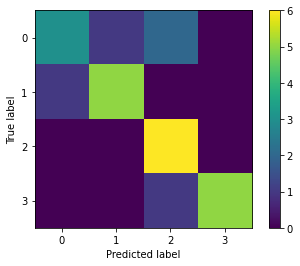

In [73]:
cm_dis.plot(include_values = False)

In [74]:
model.save('model.h5')

In [77]:
import visualkeras as vk

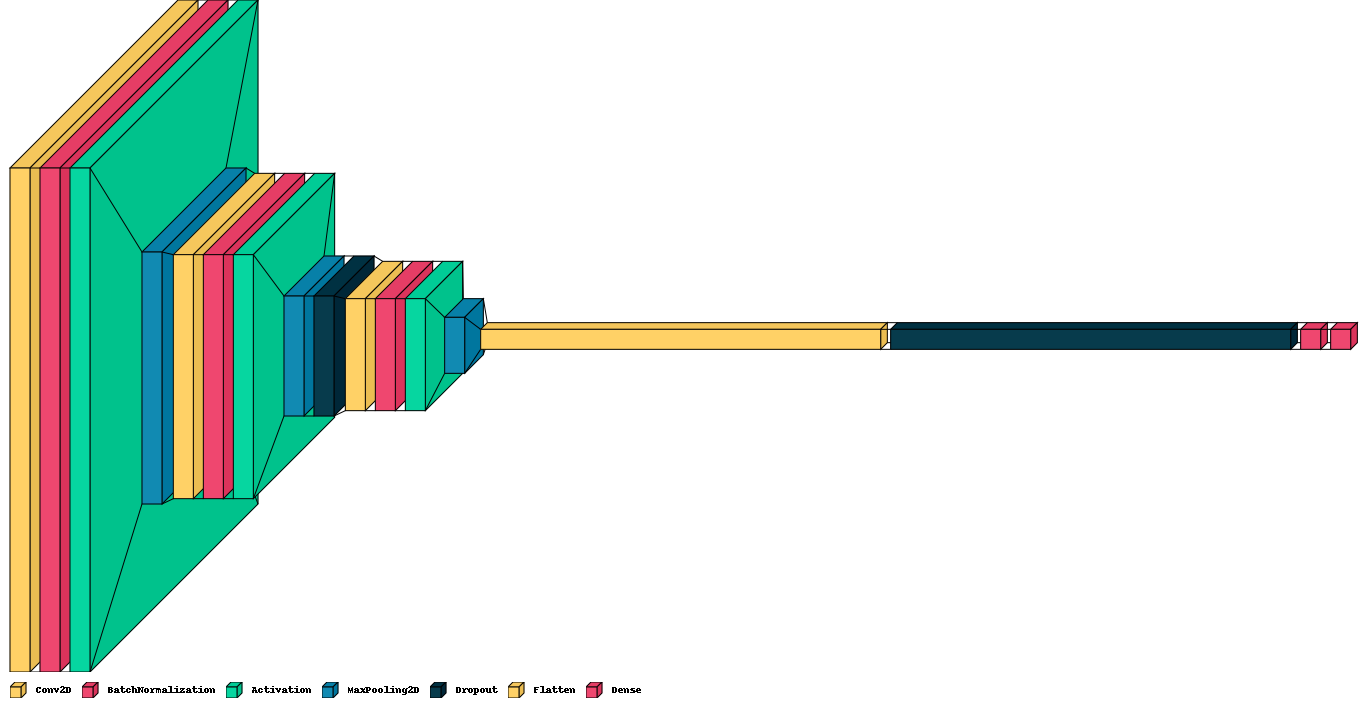

In [78]:
vk.layered_view(model, legend = True)